In [1]:
from keras import models
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def display_feature_maps(network,img_array,layer_no, no_cols=4):

    layer_outputs = [layer.output for layer in network.layers]
    activations_model = models.Model(inputs=network.input, outputs = layer_outputs)
    activations = activations_model.predict(img_array)

    # collect images in list

    no_maps = np.shape(activations[layer_no])[-1]
    print("layer %d, no maps %d"%(layer_no, no_maps))
    fmaps =activations[layer_no]
    img_list = []
    for i in range(no_maps):
        img = fmaps[0,:,:,i]
        img_list.append(img)

    #    display images in no_cols

    no_rows = no_maps // no_cols
    i = 0
    for row in range(no_rows):
        fig, axs = plt.subplots(1, no_cols,figsize=(18,18))
        for col in range(no_cols):
            axs[col].axis('off')
            axs[col].imshow(img_list[i])
            axs[col].set_title(str(i))
            i +=1

        plt.show()

def get_index(network,layer_name):
    layer_names = [layer.name for layer in network.layers]
    return layer_names.index(layer_name)

In [2]:
import keras.losses
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'C:\\--Mine\\My Files\\Uni\\Y3\\Deep Learning\\assignment\\signlang'

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
val_dir = os.path.join(base_dir,'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100,100),batch_size=20, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir,target_size=(100,100),batch_size=20, class_mode='categorical')



test_generator = test_datagen.flow_from_directory(test_dir,target_size=(100,100),batch_size=20, class_mode='categorical', shuffle=False)



Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.
Found 287 images belonging to 10 classes.


In [3]:
#test generators

import matplotlib.pyplot as plt

#for data_batch, label_batch in train_generator:
#    print('data batch shape', data_batch.shape)
#    print('label batch shape', label_batch.shape)
#    print('sample data shape', data_batch[1].shape)
#    print('sample 20 labels', label_batch)
#    break



#fig=plt.figure(figsize=(20,20))
#columns = 3
#rows = 2
#for i in range(1,7):
#    img = data_batch[i]
#    ax=fig.add_subplot(rows, columns, i)
#    plt.subplots_adjust(hspace=None,wspace=0.01)
#    ax.title.set_text(str(i)+" label=" + str(label_batch[i]))
#    plt.imshow(img)
#plt.show()

In [17]:
from keras import models, layers


from keras.applications import VGG16
vgg_base = VGG16(weights='imagenet', include_top=False,input_shape=(100,100,3))
network = models.Sequential()
network.add(vgg_base)
network.add(layers.Flatten())

network.add(layers.Dropout(0.5))

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10,activation='sigmoid'))

network.summary()

ValueError: Input 0 of layer "global_average_pooling1d" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 3, 3, 512)

In [5]:
from keras import optimizers
#network.compile(loss='categorical_crossentropy', optimizer= optimizers.RMSprop(learning_rate=1e-5), metrics=['acc'] )

network.compile(loss='categorical_crossentropy', optimizer= optimizers.Adam(learning_rate=1e-5), metrics=['acc'] )


hist = network.fit(train_generator, steps_per_epoch=97, epochs=30,
                   validation_data=val_generator, validation_steps=28)



Epoch 1/30
97/97 [==============================] - 24s 44ms/step - loss: 1.6244 - acc: 0.4287 - val_loss: 0.3264 - val_acc: 0.9142
Epoch 2/30
97/97 [==============================] - 3s 32ms/step - loss: 0.3511 - acc: 0.8823 - val_loss: 0.1248 - val_acc: 0.9617
Epoch 3/30
97/97 [==============================] - 3s 32ms/step - loss: 0.1332 - acc: 0.9570 - val_loss: 0.0829 - val_acc: 0.9708
Epoch 4/30
97/97 [==============================] - 3s 36ms/step - loss: 0.0811 - acc: 0.9793 - val_loss: 0.0690 - val_acc: 0.9781
Epoch 5/30
97/97 [==============================] - 3s 34ms/step - loss: 0.0548 - acc: 0.9850 - val_loss: 0.0387 - val_acc: 0.9872
Epoch 6/30
97/97 [==============================] - 3s 33ms/step - loss: 0.0487 - acc: 0.9886 - val_loss: 0.0311 - val_acc: 0.9891
Epoch 7/30
97/97 [==============================] - 3s 33ms/step - loss: 0.0197 - acc: 0.9953 - val_loss: 0.0472 - val_acc: 0.9818
Epoch 8/30
97/97 [==============================] - 3s 32ms/step - loss: 0.0318 - 

In [6]:
network.save('asl_network')

INFO:tensorflow:Assets written to: asl_network\assets


INFO:tensorflow:Assets written to: asl_network\assets


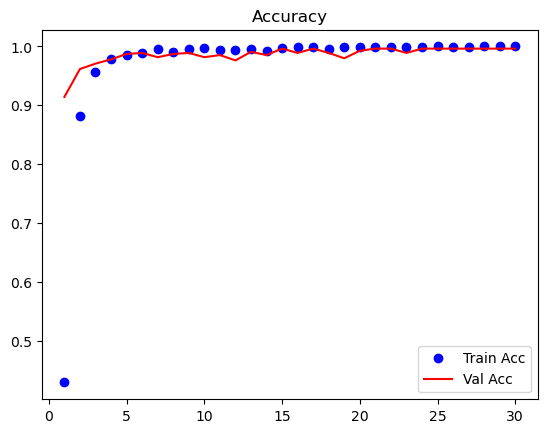

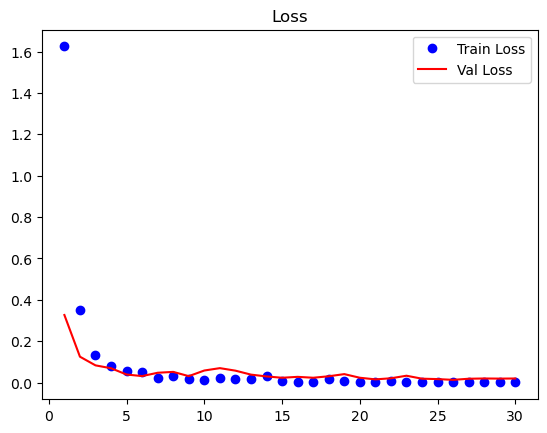

In [7]:
#plot results

import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo', label='Train Acc')
plt.plot(epochs,val_acc, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs,loss,'bo', label='Train Loss')
plt.plot(epochs,val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()




In [8]:
res = network.evaluate(test_generator, steps=15, verbose=1)
print('Accuracy on test set: %.3f' % res[1])

15/15 [==============================] - 1s 37ms/step - loss: 0.0014 - acc: 1.0000
Accuracy on test set: 1.000


In [12]:
network = models.load_model("asl_network")
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dropout (Dropout)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 512)               2359808   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 17,079,626
Trainable params: 17,079,626
Non-trainable params: 0
_________________________________________________________________


In [35]:
import tensorflow as tf
for data_batch, label_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('label batch shape', label_batch.shape)
    print('sample data shape', data_batch[1].shape)
    #print('sample 20 labels', label_batch)

    break

layer_outputs = [layer.output for layer in network.layers]
activations_model = models.Model(inputs=network.input, outputs = layer_outputs)
activations = activations_model.predict(train_generator)

# collect images in list

no_maps = np.shape(activations['flatten'])[-1]
print("layer %d, no maps %d"%('flatten', no_maps))
fmaps =activations['flatten']
img_list = []
for i in range(no_maps):
    img = fmaps[0,:,:,i]
    img_list.append(img)

#    display images in no_cols
no_cols = 3
no_rows = no_maps // no_cols
i = 0
for row in range(no_rows):
    fig, axs = plt.subplots(1, no_cols,figsize=(18,18))
    for col in range(no_cols):
        axs[col].axis('off')
        axs[col].imshow(img_list[i])
        axs[col].set_title(str(i))
        i +=1

    plt.show()

data batch shape (20, 100, 100, 3)
label batch shape (20, 10)
sample data shape (100, 100, 3)


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'") at layer "block1_conv1". The following previous layers were accessed without issue: []